In [2]:
import numpy as np
import pandas as pd
import spacy
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
nlp = spacy.load("en_core_web_sm")

### Reading twitter F1 recent data

In [4]:
df1 = pd.read_csv('F1_recent.csv',index_col=0)
df1.head()

,Created at,Text
0,2022-05-05 21:05:00,The grid has certainly enjoyed Miami so far! 🌴...
1,2022-05-05 20:45:00,"""I know you struggle with maths"" 😆\n\n@LandoNo..."
2,2022-05-05 20:04:00,Your first glimpse of some action around Miami...
3,2022-05-05 19:58:24,RT @yukitsunoda07: https://t.co/qk1dNNQRjE
4,2022-05-05 19:30:00,Checking out the all-new Miami track! 🤩\n\n#Mi...


In [9]:
df1.shape

(80, 2)

### Tweets

In [38]:
df1['Text']

0     The grid has certainly enjoyed Miami so far! 🌴...
1     "I know you struggle with maths" 😆\n\n@LandoNo...
2     Your first glimpse of some action around Miami...
3            RT @yukitsunoda07: https://t.co/qk1dNNQRjE
4     Checking out the all-new Miami track! 🤩\n\n#Mi...
                            ...                        
75    "I couldn’t be happier with the driver line-up...
76    Oooh, we're liking the look of this @ZhouGuany...
77    This, is poetry in motion 😍\n\n#ImolaGP #F1 ht...
78    Williams team boss Jost Capito is working hard...
79    It's been a brilliant start to @ValtteriBottas...
Name: Text, Length: 80, dtype: object

In [12]:
df1.Text[0].split(" ")

['The',
 'grid',
 'has',
 'certainly',
 'enjoyed',
 'Miami',
 'so',
 'far!',
 '🌴\n\nTake',
 'a',
 'look',
 'at',
 'what',
 'they',
 'have',
 'been',
 'getting',
 'up',
 'to',
 '🤩\n\n#MiamiGP',
 '#F1\n\nhttps://t.co/d6F9MmKcOq']

### Cleaning and Creating word corpus for word cloud

In [60]:
sentence_list = []
for row in df1.Text:
    for comment in row.split(" "):
        sentence_list.append(comment)
        

In [61]:
bow=[]
for sentence in sentence_list:
    doc = nlp(sentence)

    for token in doc:
        if token.is_stop == False and token.is_alpha==True:
            bow.append((token.lemma_).lower())
comment_text = ' '.join(word for word in bow)


In [55]:
with open("F1_recent_cleaned.txt", 'w') as file:
    file.write(comment_text)

In [28]:
#newStop=['sebastian','vettel','weekend','race','driver','team','weekend','aston','martin','seb','car','year','new','grand pix','like','season','think','saudiarabiangp']

### word cloud for F1 twitter

In [16]:
def generate_wordcloud(text,stopwords=None):
    wordcloud = WordCloud(collocations=True,
                          width=1600,
                          height=1000,
                          colormap='Accent',
                          background_color='black',
                          stopwords=stopwords).generate(text)
    plt.figure(figsize=[20,15])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

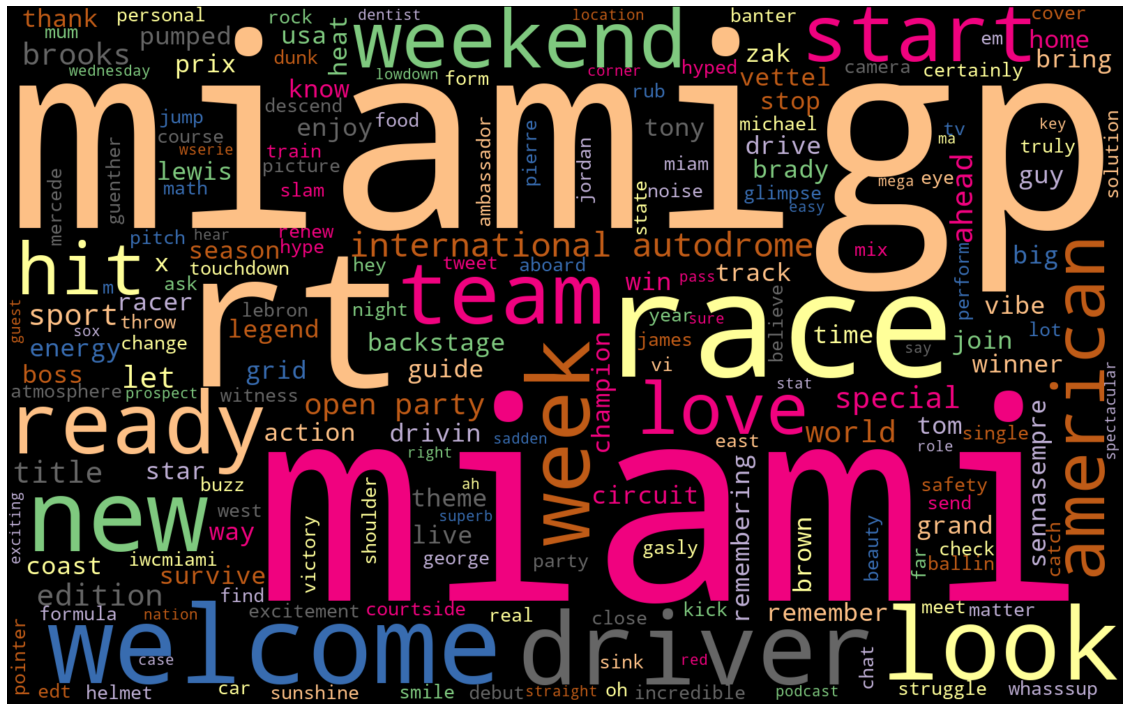

In [58]:
generate_wordcloud(comment_text) 

### Reading reddit F1 recent data

In [6]:
df = pd.read_csv('formula1_recent_comments.csv', index_col=0)
df.head(20)

,comments
0,[]
1,['Translated by DeepL\n\nThe FIA is going to e...
2,"['“So, What’s the dress code”? \n“Business Rac..."
3,"[""Zhou's shorts are stylish"", '[Instagram stor..."
4,"['I think Max is wearing his GF’s glasses', '6..."
5,"['Jesus, look at the Williams’ top speed. If o..."
6,[]
7,['Direct link to Video [here (HQ)](https://vid...
8,['Original Resolution Images from tweet: \n[I...
9,['I love the air intake. It’s perfect. Looks a...


In [12]:
df.comments[1]

'[\'Translated by DeepL\\n\\nThe FIA is going to enforce more strictly the rule that drivers are not allowed to wear jewelry and wear their own non-fireproof clothing. Indeed, it will become part of the technical inspection of the car.\\n\\nIt was before the Australian Grand Prix that the driver notes, prepared by the race director, highlighted some already existing rules. Drivers were not allowed to wear jewelry, nor were they allowed to wear their own clothing that was not homologated by the FIA. Lewis Hamilton, among others, took umbrage and indicated that he would in fact be wearing more, while Mercedes team principal Toto Wolff was surprised by the new race directors\\\' focus points: "Is this the battle they want to take on Hamilton now? Well, if this is the worst, we\\\'re not complaining."\\n\\nTeams now actually risk a penalty\\n\\nThat mention of rules that have been in place for a long time had to be read as a warning at the time, as it now appears. Now, in fact, the FIA is 

In [8]:
sentence_list1 = []
for row in df.comments:
    for comment in row.split(" "):
        sentence_list1.append(comment)


In [9]:
bow=[]
for sentence in sentence_list1:
    doc = nlp(sentence)

    for token in doc:
        if token.is_stop == False and token.is_alpha==True:
            bow.append((token.lemma_).lower())
comment_text1 = ' '.join(word for word in bow)


In [10]:
comment_text1

'translate fia go enforce strictly rule driver allow wear jewelry wear non fireproof clothing technical inspection australian grand prix driver note prepare director highlight exist rule driver allow wear jewelry allow wear clothing homologate fia lewis hamilton take umbrage indicate fact wear mercede team principal toto wolff surprised new focus point battle want hamilton worst complain risk mention rule place long time read warn time appear fact fia go step start weekend team sign document declare car complie technical regulation additional passage include form team declare driver wear jewelry wear clothing see document new aspect technical inspection car mean meet registration consider normally result exclusion practice possible fine grid penalty wolff react shift rule presence express nuance opinion remember fia prevent injury cause jewelry wait freak accident play fia draw line key issue understand come dress code race inspire colour flag season checker sleeve homage type flag ahe

### word cloud for F1 reddit

In [19]:
#nlp.Defaults.stop_words |= {"let","definitely","think","actually","try","wait","lot","race","look"}
stop_word=["let","definitely","think","actually","try","wait","lot","look"]+list(nlp.Defaults.stop_words)

In [20]:
def generate_wordcloud(text,stopwords=stop_word):
    wordcloud = WordCloud(collocations=True,
                          width=1600,
                          height=1000,
                          colormap='Accent',
                          background_color='black',
                          stopwords=stopwords).generate(text)
    plt.figure(figsize=[20,15])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

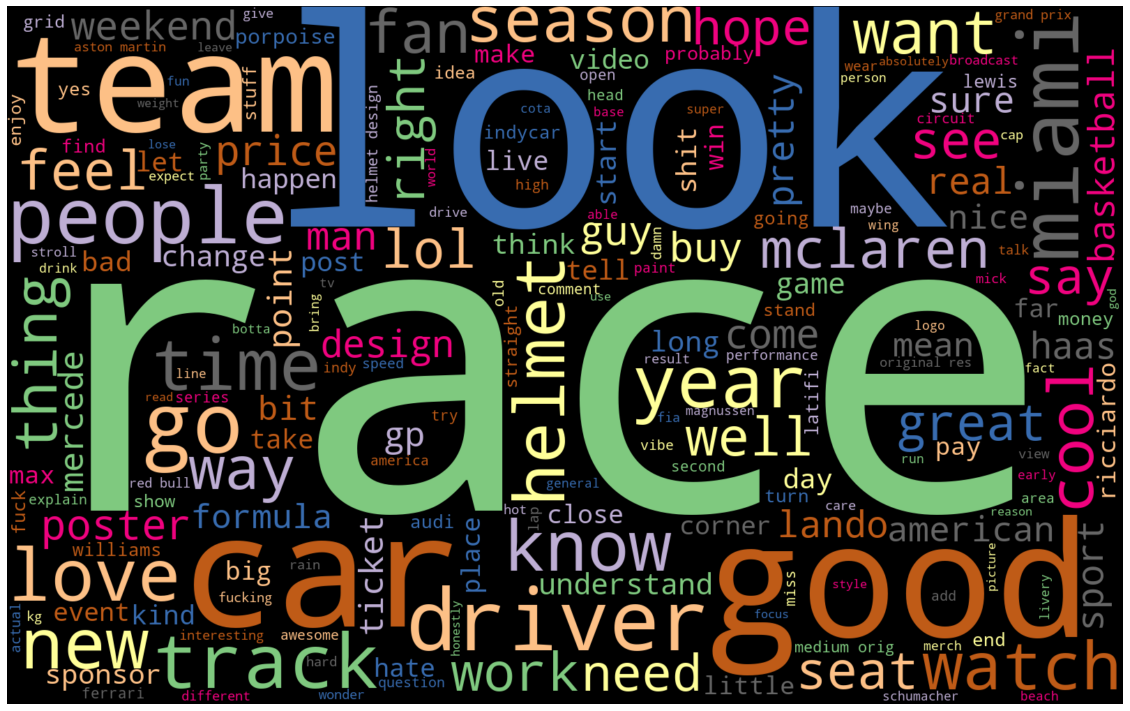

In [15]:
generate_wordcloud(comment_text1) #without stopwords

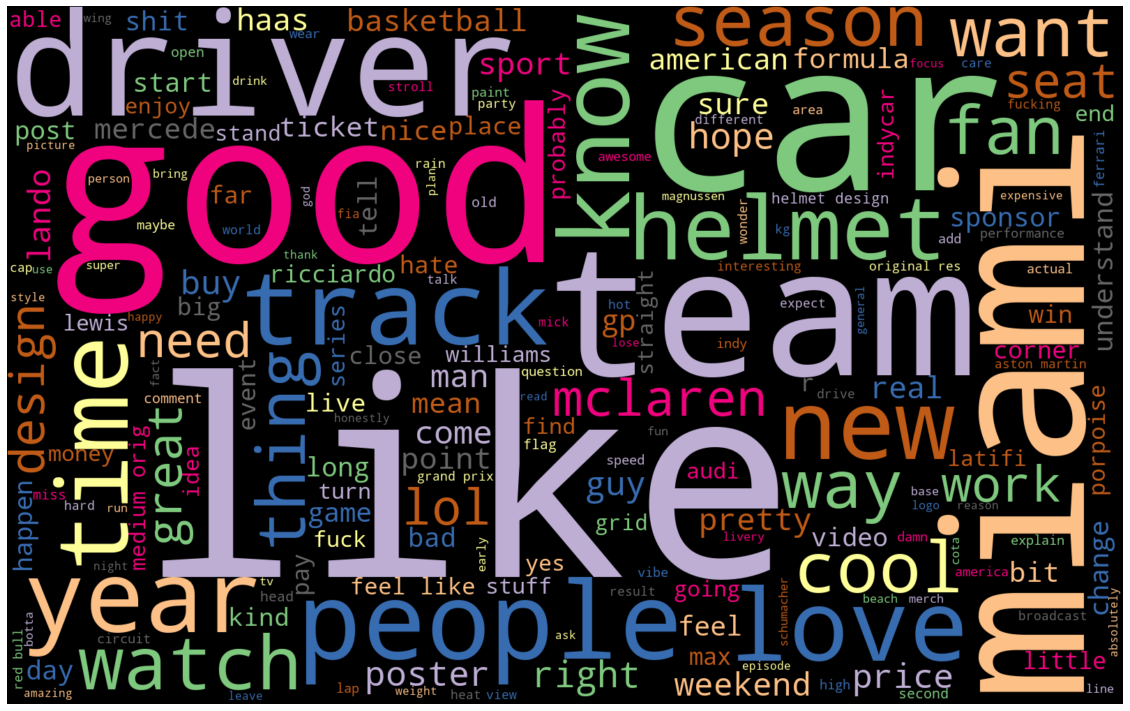

In [18]:
generate_wordcloud(comment_text1) #with stopwords